In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
pd.read_csv('../inner_averaged_local_soap_mofs.csv')


,C-C_1,C-C_2,C-H_1,C-H_2,C-O_1,C-O_2,C-V_1,C-V_2,H-H_1,H-H_2,...,Dy-N_1,Dy-N_2,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2
0,0.606729,4.104813e-04,1.960778,-9.536714e-04,0.768790,4.918767e-04,0.169485,0.000051,6.336679,2.239353e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.402389,1.178922e-34,0.821303,1.204494e-34,0.106896,4.971153e-35,0.000000,0.000000,1.676335,2.619894e-33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.169435,2.121687e-08,2.936747,-4.895232e-09,0.929966,-1.669589e-08,0.000000,0.000000,7.374917,1.214716e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.919702,5.012132e-06,0.219880,5.165943e-10,0.337257,-7.402103e-06,0.000000,0.000000,0.052568,8.266590e-12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.864411,1.313350e-04,4.267314,-1.214154e-04,0.529791,-2.814131e-06,0.000000,0.000000,9.767143,1.129896e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,3.180811,2.824456e-05,1.217880,5.120635e-05,0.185731,-1.957441e-05,0.000000,0.000000,0.466306,9.387220e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3085,4.955978,1.266652e-05,6.528851,-8.282360e-06,1.853285,-3.110868e-06,0.000000,0.000000,8.600906,5.415655e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3086,2.317266,2.360571e-06,5.271056,1.576728e-05,0.828933,-1.148460e-05,0.000000,0.000000,11.990008,1.053165e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3087,3.363378,9.318786e-06,5.577008,-2.031953e-05,1.164413,8.211734e-06,0.000000,0.000000,9.247553,4.667266e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
pd.read_csv('../kernelPCA_soap_mofs.csv')

,C-C_1,C-C_2,C-H_1,C-H_2,C-O_1,C-O_2,C-V_1,C-V_2,H-H_1,H-H_2,...,Dy-N_1,Dy-N_2,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2
0,9.913646,0.219398,12.334559,-0.045885,0.336669,0.000244,0.010825,-0.00259,56.320046,1.095121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-14.362669,-0.208199,-17.941820,0.151508,-0.773448,0.027419,0.000000,0.00000,-87.928944,-1.807842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-27.892495,-0.389759,-32.693050,0.408320,-0.277294,0.002432,0.000000,0.00000,-103.180044,-2.936626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.117354,0.191295,1.691878,-0.006119,0.058703,-0.005025,0.000000,0.00000,28.218185,0.359567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.387776,0.387618,0.756924,-0.022541,0.294804,-0.014325,0.000000,0.00000,2.496534,0.118561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,97.441779,1.654103,94.709547,0.093146,2.224684,-0.036057,0.000000,0.00000,227.450314,5.570205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3085,83.610496,1.618959,80.017987,-0.014167,4.283533,-0.129561,0.000000,0.00000,193.382068,5.106548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3086,-148.861376,-1.669024,-127.268660,-0.826431,-24.889878,0.017710,0.000000,0.00000,-196.212349,-7.918991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3087,-85.420846,-1.302106,-110.443306,0.946769,-5.955111,0.029825,0.000000,0.00000,-305.420467,-8.553773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pd.read_csv('../avg_kernelPCA_soap_mofs.csv')

,C-C_1,C-C_2,C-H_1,C-H_2,C-O_1,C-O_2,C-V_1,C-V_2,H-H_1,H-H_2,...,Dy-O_1,Dy-O_2,Cr-Mn_1,Cr-Mn_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2
0,0.291578,0.006453,0.362781,-0.001350,0.009902,0.000007,0.000318,-0.000076,1.656472,0.032209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.284167,0.006800,0.344255,-0.002423,0.082152,0.000508,0.000000,0.000000,1.237702,0.029701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.243435,-0.003529,-0.304099,0.002568,-0.013109,0.000465,0.000000,0.000000,-1.490321,-0.030641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.390490,0.007786,0.009985,-0.000427,0.008944,-0.000156,0.000000,0.000000,0.034105,0.001522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.263451,0.005873,0.011469,-0.000342,0.004467,-0.000217,0.000000,0.000000,0.037826,0.001796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,-0.347807,-0.003900,-0.297357,-0.001931,-0.058154,0.000041,0.000000,0.000000,-0.458440,-0.018502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3085,-0.190485,-0.002897,-0.240225,0.001694,-0.001750,0.000026,0.000000,0.000000,-0.676630,-0.016982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3086,0.181762,0.003519,0.173952,-0.000031,0.009312,-0.000282,0.000000,0.000000,0.420396,0.011101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3087,-0.170842,-0.002604,-0.220887,0.001894,-0.011910,0.000060,0.000000,0.000000,-0.610841,-0.017108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Update these file paths to match your files
FEATURES_FILE1 = 'zeopp_final_results.csv'  # Your Zeo++ features
FEATURES_FILE2 = '../avg_kernelPCA_soap_mofs.csv'
LABELS_FILE = '../id_labels.csv'           # Your labels file
TARGET_COL = 'label'         # Your target variable

# Load data
print("Loading features...")
feat1 = pd.read_csv(FEATURES_FILE1)
feat1["filename"] = feat1["filename"].astype(str).str.strip()
feat2 = pd.read_csv(FEATURES_FILE2)
feat2["filename"] = feat2["filename"].astype(str).str.strip(".cif")
features_df = pd.merge(feat1, feat2, on='filename', how='inner')

# Clean whitespace from filename column
features_df['filename'] = features_df['filename'].astype(str).str.strip()
print(f"Features shape: {features_df.shape}")
print(f"Feature columns: {list(features_df.columns)}")

print("\nLoading labels...")
labels_df = pd.read_csv(LABELS_FILE)
# Rename 'id' column to 'filename' to match features and clean whitespace
labels_df = labels_df.rename(columns={'id': 'filename'})
labels_df['filename'] = labels_df['filename'].astype(str).str.strip()
print(f"Labels shape: {labels_df.shape}")
print(f"Label columns: {list(labels_df.columns)}")

# Display first few rows
print("\nFirst 5 rows of features:")
display(features_df.head())

print("\nFirst 5 rows of labels:")
display(labels_df.head())

# Check if filenames match now
print("\nFilename matching check:")
print("Sample features filenames:", features_df['filename'].head(3).tolist())
print("Sample labels filenames:", labels_df['filename'].head(3).tolist())

Loading features...
Features shape: (3089, 498)
Feature columns: ['filename', 'Di_A', 'Df_A', 'Dif_A', 'density_gcc', 'unit_cell_volume_A3', 'SA_A2', 'SA_m2_cm3', 'SA_m2_g', 'AV_A3', 'AV_fraction', 'AV_cm3_g', 'num_channels', 'num_pockets', 'C-C_1', 'C-C_2', 'C-H_1', 'C-H_2', 'C-O_1', 'C-O_2', 'C-V_1', 'C-V_2', 'H-H_1', 'H-H_2', 'H-O_1', 'H-O_2', 'H-V_1', 'H-V_2', 'O-O_1', 'O-O_2', 'O-V_1', 'O-V_2', 'V-V_1', 'V-V_2', 'C-N_1', 'C-N_2', 'C-Zn_1', 'C-Zn_2', 'H-N_1', 'H-N_2', 'H-Zn_1', 'H-Zn_2', 'N-N_1', 'N-N_2', 'N-O_1', 'N-O_2', 'N-Zn_1', 'N-Zn_2', 'O-Zn_1', 'O-Zn_2', 'Zn-Zn_1', 'Zn-Zn_2', 'C-F_1', 'C-F_2', 'F-F_1', 'F-F_2', 'F-H_1', 'F-H_2', 'F-N_1', 'F-N_2', 'F-O_1', 'F-O_2', 'F-Zn_1', 'F-Zn_2', 'C-Er_1', 'C-Er_2', 'Er-Er_1', 'Er-Er_2', 'Er-H_1', 'Er-H_2', 'Er-O_1', 'Er-O_2', 'C-Cu_1', 'C-Cu_2', 'Cu-Cu_1', 'Cu-Cu_2', 'Cu-H_1', 'Cu-H_2', 'Cu-N_1', 'Cu-N_2', 'Cu-O_1', 'Cu-O_2', 'C-Fe_1', 'C-Fe_2', 'Fe-Fe_1', 'Fe-Fe_2', 'Fe-H_1', 'Fe-H_2', 'Fe-N_1', 'Fe-N_2', 'Fe-O_1', 'Fe-O_2', 'C-Li_1',

,filename,Di_A,Df_A,Dif_A,density_gcc,unit_cell_volume_A3,SA_A2,SA_m2_cm3,SA_m2_g,AV_A3,...,Dy-O_1,Dy-O_2,Cr-Mn_1,Cr-Mn_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2
0,DB0-m12_o14_bcu_repeat,8.11451,5.51466,8.11451,0.720537,2922.000,632.0630,2163.120,3002.090,427.7810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB0-m12_o8_o32_tfz-d_repeat,16.18707,12.80705,15.79250,0.364317,7065.980,1242.8800,1758.970,4828.130,3585.2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB0-m15_o11_o140_f0_fsc_repeat,7.79926,5.38819,7.79926,0.720727,1673.670,357.1030,2133.650,2960.410,203.5190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB0-m15_o14_o137_f0_fsc_repeat,5.96666,5.50893,5.94287,1.102130,979.831,143.9140,1468.760,1332.660,102.8820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DB0-m15_o15_o48_f0_fsc_repeat,5.66157,5.37626,5.66157,1.247290,895.095,89.1508,995.992,798.527,38.8471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



First 5 rows of labels:


,filename,label
0,DB5-hypotheticalMOF_17652_0_0_1_21_9_7_repeat,13.791591
1,DB0-m2_o8_o23_f0_pcu.sym.80_repeat,3.786996
2,DB0-m29_o90_o1500_f0_pts.sym.31_repeat,9.382537
3,DB0-m3_o48_o25_f0_fsc.sym.3_repeat,11.650365
4,DB0-m2_o1_o9_f0_nbo.sym.104_repeat,1.412915



Filename matching check:
Sample features filenames: ['DB0-m12_o14_bcu_repeat', 'DB0-m12_o8_o32_tfz-d_repeat', 'DB0-m15_o11_o140_f0_fsc_repeat']
Sample labels filenames: ['DB5-hypotheticalMOF_17652_0_0_1_21_9_7_repeat', 'DB0-m2_o8_o23_f0_pcu.sym.80_repeat', 'DB0-m29_o90_o1500_f0_pts.sym.31_repeat']


In [6]:
# Merge datasets
print("Merging features and labels...")
ml_data = pd.merge(features_df, labels_df, on='filename', how='inner')
print(f"Merged data shape: {ml_data.shape}")
print(f"Successfully merged {len(ml_data)} samples")

# Check for any missing merges
feature_files = set(features_df['filename'])
label_files = set(labels_df['filename'])
print(f"\nFiles in features only: {len(feature_files - label_files)}")
print(f"Files in labels only: {len(label_files - feature_files)}")
print(f"Files in both: {len(feature_files.intersection(label_files))}")

display(ml_data.head())

Merging features and labels...
Merged data shape: (3089, 499)
Successfully merged 3089 samples

Files in features only: 0
Files in labels only: 0
Files in both: 3089


,filename,Di_A,Df_A,Dif_A,density_gcc,unit_cell_volume_A3,SA_A2,SA_m2_cm3,SA_m2_g,AV_A3,...,Dy-O_2,Cr-Mn_1,Cr-Mn_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2,label
0,DB0-m12_o14_bcu_repeat,8.11451,5.51466,8.11451,0.720537,2922.000,632.0630,2163.120,3002.090,427.7810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.427428
1,DB0-m12_o8_o32_tfz-d_repeat,16.18707,12.80705,15.79250,0.364317,7065.980,1242.8800,1758.970,4828.130,3585.2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.214721
2,DB0-m15_o11_o140_f0_fsc_repeat,7.79926,5.38819,7.79926,0.720727,1673.670,357.1030,2133.650,2960.410,203.5190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.199601
3,DB0-m15_o14_o137_f0_fsc_repeat,5.96666,5.50893,5.94287,1.102130,979.831,143.9140,1468.760,1332.660,102.8820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.401891
4,DB0-m15_o15_o48_f0_fsc_repeat,5.66157,5.37626,5.66157,1.247290,895.095,89.1508,995.992,798.527,38.8471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.446165


In [7]:
feature_cols = ml_data.columns[1:-1]

In [8]:
feature_cols

Index(['Di_A', 'Df_A', 'Dif_A', 'density_gcc', 'unit_cell_volume_A3', 'SA_A2',
       'SA_m2_cm3', 'SA_m2_g', 'AV_A3', 'AV_fraction',
       ...
       'Dy-O_1', 'Dy-O_2', 'Cr-Mn_1', 'Cr-Mn_2', 'Al-F_1', 'Al-F_2', 'Br-Co_1',
       'Br-Co_2', 'F-Ti_1', 'F-Ti_2'],
      dtype='object', length=497)

In [9]:
def find_high_correlations(corr_matrix, threshold=0.9):
    """Find pairs of features with correlation above threshold"""
    high_corr_pairs = []
    
    # Get upper triangle of correlation matrix (avoid duplicates)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_val
                })
    
    return pd.DataFrame(high_corr_pairs).sort_values('correlation', key=abs, ascending=False)


In [10]:
print("Calculating correlation matrix...")
# feature_data = features_df.drop("filename", axis = 1)
correlation_matrix = ml_data[feature_cols].corr()
print(f"Correlation matrix shape: {correlation_matrix.shape}")
print("Correlation matrix calculated!")

Calculating correlation matrix...
Correlation matrix shape: (497, 497)
Correlation matrix calculated!


In [11]:
print(f"\nCorrelation statistics:")
print(f"Max correlation: {correlation_matrix.max().max():.3f}")
print(f"Min correlation: {correlation_matrix.min().min():.3f}")


Correlation statistics:
Max correlation: 1.000
Min correlation: -1.000


In [12]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # Upper triangle, exclude diagonal
high_corr_count = (np.abs(correlation_matrix.where(mask)) > 0.9).sum().sum()
print(f"Number of feature pairs with |correlation| > 0.9: {high_corr_count}")

Number of feature pairs with |correlation| > 0.9: 664


In [13]:
print("=== HIGHLY CORRELATED FEATURE PAIRS ===")
high_corr_df = find_high_correlations(correlation_matrix, threshold=0.9)

if len(high_corr_df) > 0:
    print(f"Found {len(high_corr_df)} feature pairs with |correlation| > 0.9:")
    print(high_corr_df.to_string(index=False))
else:
    print("No feature pairs found with |correlation| > 0.9")
    print("Trying lower threshold...")
    high_corr_df = find_high_correlations(correlation_matrix, threshold=0.8)
    print(f"Found {len(high_corr_df)} feature pairs with |correlation| > 0.8:")
    print(high_corr_df.head(10))  # Show top 10

=== HIGHLY CORRELATED FEATURE PAIRS ===
Found 664 feature pairs with |correlation| > 0.9:
           feature1    feature2  correlation
            In-In_2      In-O_1     1.000000
              H-Y_1       Y-Y_1     1.000000
             C-Sc_2      H-Sc_1    -1.000000
            Ag-Ag_1      Ag-O_2    -1.000000
             H-Sc_1      O-Sc_2     1.000000
             H-Sc_1      H-Sc_2    -1.000000
             H-Tb_1      O-Tb_2     1.000000
            In-In_1      In-O_1     1.000000
             Dy-H_2      Dy-O_2    -1.000000
             H-Tb_2      N-Tb_1    -1.000000
             C-Sc_1      O-Sc_2     1.000000
            Ag-Ag_1     Ag-Cr_2    -1.000000
            Ag-Cr_1     Ag-Cr_2    -1.000000
             C-Tb_1      H-Tb_1     1.000000
            Dy-Dy_1      Dy-N_1     1.000000
             O-Sc_2     Sc-Sc_2     1.000000
            Ag-Ag_2     Ag-Cr_2    -1.000000
            Cu-Si_2      F-Si_1    -1.000000
             C-Tb_2      N-Tb_2     1.000000
          

In [14]:
# Create correlation heatmap
plt.figure(figsize=(20, 16))

# For large correlation matrices, show only high correlations
if len(feature_cols) > 50:
    # Show only correlations > 0.7 for readability
    corr_display = correlation_matrix.copy()
    corr_display[np.abs(corr_display) < 0.7] = 0
    title = "Feature Correlations (|correlation| ≥ 0.7 shown)"
else:
    corr_display = correlation_matrix
    title = "Feature Correlations"

<Figure size 2000x1600 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

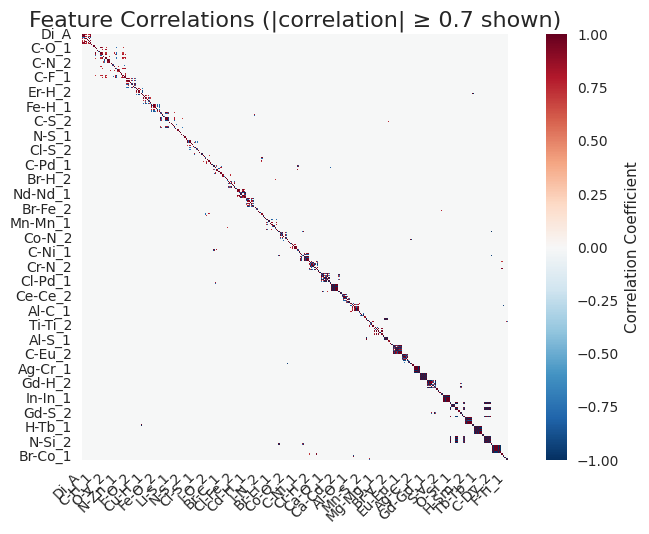

In [15]:
# Create heatmap
sns.heatmap(corr_display, 
            annot=False,  # Don't show numbers (too crowded)
            cmap='RdBu_r', 
            center=0,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title(title, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
def remove_correlated_features(corr_matrix, ml_data, target_col, threshold=0.9, method='variance'):
    """
    Remove highly correlated features intelligently
    
    Methods:
    - 'variance': Keep feature with higher variance
    - 'target_corr': Keep feature with higher correlation to target
    - 'importance': Keep feature with higher feature importance (requires model)
    """
    
    features_to_remove = set()
    target_correlations = ml_data[feature_cols].corrwith(ml_data[target_col]).abs()
    feature_variances = ml_data[feature_cols].var()
    
    # Find correlated pairs
    high_corr_pairs = find_high_correlations(corr_matrix, threshold)
    
    print(f"=== FEATURE REMOVAL STRATEGY: {method.upper()} ===")
    print(f"Processing {len(high_corr_pairs)} highly correlated pairs...")
    
    for _, row in high_corr_pairs.iterrows():
        feat1, feat2 = row['feature1'], row['feature2']
        corr_val = row['correlation']
        
        # Skip if either feature already marked for removal
        if feat1 in features_to_remove or feat2 in features_to_remove:
            continue
            
        # Decide which feature to remove
        if method == 'variance':
            # Keep feature with higher variance
            if feature_variances[feat1] >= feature_variances[feat2]:
                remove_feat = feat2
                keep_feat = feat1
                reason = f"lower variance ({feature_variances[feat2]:.4f} vs {feature_variances[feat1]:.4f})"
            else:
                remove_feat = feat1
                keep_feat = feat2
                reason = f"lower variance ({feature_variances[feat1]:.4f} vs {feature_variances[feat2]:.4f})"
                
        elif method == 'target_corr':
            # Keep feature with higher correlation to target
            if target_correlations[feat1] >= target_correlations[feat2]:
                remove_feat = feat2
                keep_feat = feat1
                reason = f"lower target correlation ({target_correlations[feat2]:.4f} vs {target_correlations[feat1]:.4f})"
            else:
                remove_feat = feat1
                keep_feat = feat2
                reason = f"lower target correlation ({target_correlations[feat1]:.4f} vs {target_correlations[feat2]:.4f})"
        
        features_to_remove.add(remove_feat)
        print(f"Removing '{remove_feat}' (corr={corr_val:.3f} with '{keep_feat}'): {reason}")
    
    # Create cleaned feature list
    features_cleaned = [f for f in feature_cols if f not in features_to_remove]
    
    print(f"\n=== SUMMARY ===")
    print(f"Original features: {len(feature_cols)}")
    print(f"Features removed: {len(features_to_remove)}")
    print(f"Remaining features: {len(features_cleaned)}")
    print(f"Removed features: {sorted(features_to_remove)}")
    
    return features_cleaned, list(features_to_remove)


In [17]:
# Apply feature removal
print("Method 1: Remove based on variance")
features_cleaned_var, removed_var = remove_correlated_features(
    correlation_matrix, ml_data, TARGET_COL, threshold=0.9, method='variance'
)

print("\n" + "="*60 + "\n")

print("Method 2: Remove based on target correlation")
features_cleaned_target, removed_target = remove_correlated_features(
    correlation_matrix, ml_data, TARGET_COL, threshold=0.9, method='target_corr'
)

Method 1: Remove based on variance
=== FEATURE REMOVAL STRATEGY: VARIANCE ===
Processing 664 highly correlated pairs...
Removing 'In-In_2' (corr=1.000 with 'In-O_1'): lower variance (0.0000 vs 0.0000)
Removing 'H-Y_1' (corr=1.000 with 'Y-Y_1'): lower variance (0.0000 vs 0.0000)
Removing 'C-Sc_2' (corr=-1.000 with 'H-Sc_1'): lower variance (0.0000 vs 0.0000)
Removing 'Ag-O_2' (corr=-1.000 with 'Ag-Ag_1'): lower variance (0.0000 vs 0.0000)
Removing 'O-Sc_2' (corr=1.000 with 'H-Sc_1'): lower variance (0.0000 vs 0.0000)
Removing 'H-Sc_2' (corr=-1.000 with 'H-Sc_1'): lower variance (0.0000 vs 0.0000)
Removing 'O-Tb_2' (corr=1.000 with 'H-Tb_1'): lower variance (0.0000 vs 0.0000)
Removing 'In-O_1' (corr=1.000 with 'In-In_1'): lower variance (0.0000 vs 0.0000)
Removing 'Dy-O_2' (corr=-1.000 with 'Dy-H_2'): lower variance (0.0000 vs 0.0000)
Removing 'N-Tb_1' (corr=-1.000 with 'H-Tb_2'): lower variance (0.0000 vs 0.0000)
Removing 'Ag-Cr_2' (corr=-1.000 with 'Ag-Ag_1'): lower variance (0.0000 vs

In [18]:
removed_var

['Gd-S_2',
 'Gd-N_2',
 'Er-O_2',
 'N-Ni_2',
 'C-Sc_2',
 'Nd-O_1',
 'C-Ti_2',
 'S-V_2',
 'Dy-H_2',
 'Sc-Sc_1',
 'Cu-Si_2',
 'Zr-Zr_1',
 'I-N_2',
 'Al-P_2',
 'Br-Pd_1',
 'Br-F_2',
 'SA_A2',
 'In-In_2',
 'O-Sm_1',
 'Cu-Si_1',
 'Cr-O_1',
 'H-Si_2',
 'N-Zr_1',
 'C-Sc_1',
 'Cl-Pd_2',
 'Eu-O_1',
 'Dy-N_2',
 'Cl-Mn_2',
 'Br-Ti_1',
 'Ca-H_2',
 'H-Sc_1',
 'Fe-S_2',
 'Cd-F_2',
 'C-Ca_2',
 'Dy-Dy_2',
 'H-In_1',
 'Ag-Cr_1',
 'C-Gd_2',
 'F-S_2',
 'Cd-N_2',
 'Cl-Ti_2',
 'Cu-Li_2',
 'Al-F_2',
 'H-Tb_1',
 'Eu-O_2',
 'Ni-O_1',
 'N-N_2',
 'Br-Si_1',
 'V-V_2',
 'C-Li_1',
 'N-Si_1',
 'Ag-O_1',
 'H-Y_2',
 'Ca-Ca_2',
 'H-Mn_1',
 'C-Cr_2',
 'I-N_1',
 'Mn-Mn_2',
 'Eu-Eu_2',
 'C-Gd_1',
 'C-Fe_1',
 'Mn-N_2',
 'Cr-N_2',
 'Ni-O_2',
 'Ce-H_1',
 'C-Y_1',
 'Ce-S_2',
 'C-Mn_2',
 'Br-Co_2',
 'H-Y_1',
 'Br-Zn_2',
 'Ag-Ag_2',
 'O-P_2',
 'H-Sm_1',
 'C-Ca_1',
 'Ca-O_2',
 'C-Cd_1',
 'Dif_A',
 'O-Zn_2',
 'Co-N_2',
 'H-Zn_2',
 'Dy-O_2',
 'N-Zr_2',
 'Cu-Cu_2',
 'H-Nd_2',
 'Li-O_1',
 'N-Ti_1',
 'Mg-N_2',
 'Br-Cd_2',
 'O-Y_1',
 

In [19]:
merged_df = ml_data.drop(removed_var, axis = 1)

In [20]:
merged_df

,filename,Di_A,Df_A,unit_cell_volume_A3,SA_m2_cm3,SA_m2_g,AV_cm3_g,num_channels,num_pockets,C-C_1,...,La-N_1,Sm-Sm_1,Tb-Tb_1,Cl-F_1,Dy-Dy_1,Cr-Mn_1,Al-F_1,Br-Co_1,F-Ti_1,label
0,DB0-m12_o14_bcu_repeat,8.11451,5.51466,2922.000,2163.120,3002.090,0.203182,1,1,0.327890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,16.427428
1,DB0-m12_o8_o32_tfz-d_repeat,16.18707,12.80705,7065.980,1758.970,4828.130,1.392740,1,0,0.295048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,7.214721
2,DB0-m15_o11_o140_f0_fsc_repeat,7.79926,5.38819,1673.670,2133.650,2960.410,0.168718,1,0,0.368596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,16.199601
3,DB0-m15_o14_o137_f0_fsc_repeat,5.96666,5.50893,979.831,1468.760,1332.660,0.095270,1,0,-0.413121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,8.401891
4,DB0-m15_o15_o48_f0_fsc_repeat,5.66157,5.37626,895.095,995.992,798.527,0.034796,1,0,-0.358550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.446165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,DB7-ddmof_5561_repeat,13.23177,10.23793,13950.900,1950.420,4569.740,1.053860,1,0,-0.173044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.954847
3085,DB7-ddmof_5786_repeat,12.39721,9.96504,9895.470,1944.470,3320.750,0.549908,1,0,-0.129180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.020765
3086,DB7-ddmof_5952_repeat,10.56648,8.55026,11128.100,1879.000,2558.890,0.358708,1,0,-0.761540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000718,0.0,6.185781
3087,DB7-ddmof_6321_repeat,11.46973,9.42230,6365.400,2153.180,3365.800,0.532731,1,0,0.037269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.526927


In [21]:
# Preprocess features
print("Preprocessing data...")

# Get feature columns (exclude filename and target)
feature_cols = [col for col in merged_df.columns if col not in ['filename', TARGET_COL]]
print(f"Feature columns ({len(feature_cols)}): {feature_cols}")

# Convert 'NA' strings to NaN and make numeric
for col in feature_cols:
    if merged_df[col].dtype == 'object':
        merged_df[col] = merged_df[col].replace('NA', np.nan)
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Check missing values
print("\nMissing values per column:")
missing_counts = merged_df[feature_cols + [TARGET_COL]].isnull().sum()
print(missing_counts[missing_counts > 0])

# Remove rows with missing target
initial_rows = len(merged_df)
merged_df = merged_df.dropna(subset=[TARGET_COL])
final_rows = len(merged_df)
print(f"\nRemoved {initial_rows - final_rows} rows with missing target values")
print(f"Final dataset size: {final_rows} samples")

Preprocessing data...
Feature columns (256): ['Di_A', 'Df_A', 'unit_cell_volume_A3', 'SA_m2_cm3', 'SA_m2_g', 'AV_cm3_g', 'num_channels', 'num_pockets', 'C-C_1', 'C-H_2', 'C-O_1', 'C-O_2', 'C-V_1', 'C-V_2', 'H-H_1', 'H-O_2', 'H-V_1', 'O-O_1', 'O-V_1', 'V-V_1', 'C-N_1', 'C-N_2', 'C-Zn_1', 'C-Zn_2', 'H-N_1', 'H-N_2', 'H-Zn_1', 'N-N_1', 'N-O_1', 'N-O_2', 'N-Zn_1', 'N-Zn_2', 'O-Zn_1', 'Zn-Zn_1', 'Zn-Zn_2', 'C-F_2', 'F-F_1', 'F-H_1', 'F-H_2', 'F-N_1', 'F-N_2', 'F-O_1', 'F-O_2', 'F-Zn_1', 'C-Er_2', 'Er-Er_1', 'Er-H_1', 'Er-H_2', 'Er-O_1', 'C-Cu_2', 'Cu-Cu_1', 'Cu-H_1', 'Cu-H_2', 'Cu-N_1', 'Cu-N_2', 'Cu-O_1', 'Cu-O_2', 'C-Fe_2', 'Fe-Fe_1', 'Fe-H_1', 'Fe-H_2', 'Fe-N_1', 'Fe-O_1', 'Fe-O_2', 'C-Li_2', 'Cu-Li_1', 'H-Li_1', 'H-Li_2', 'Li-Li_1', 'C-S_1', 'C-S_2', 'H-S_1', 'H-S_2', 'Li-S_1', 'Li-S_2', 'Li-Zn_1', 'O-S_1', 'O-S_2', 'S-S_1', 'S-S_2', 'S-Zn_1', 'S-Zn_2', 'Cu-S_1', 'Cu-S_2', 'Li-N_1', 'Li-N_2', 'N-S_1', 'N-V_1', 'N-V_2', 'C-Cl_2', 'Cl-Cl_1', 'Cl-Cu_1', 'Cl-Cu_2', 'Cl-H_1', 'Cl-H_2', 'Cl-N

Dataset statistics:


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

              Di_A         Df_A  unit_cell_volume_A3    SA_m2_cm3  \
count  3089.000000  3089.000000          3089.000000  3089.000000   
mean     10.890367     8.401731          5698.629235  1808.811247   
std       4.319139     3.349969          8100.329572   501.736094   
min       3.274480     1.809160           480.895000     0.000000   
25%       8.098690     6.112580          1996.090000  1609.050000   
50%      10.002920     7.735730          3070.060000  1904.410000   
75%      12.666020     9.885780          5088.830000  2113.660000   
max      37.928760    35.543480         81731.500000  3086.150000   

           SA_m2_g     AV_cm3_g  num_channels  num_pockets        C-C_1  \
count  3089.000000  3089.000000   3089.000000  3089.000000  3089.000000   
mean   3262.163543     0.630646      1.053739     0.232761     0.029595   
std    1445.929729     0.749262      0.377937     1.121742     0.421208   
min       0.000000     0.000000      0.000000     0.000000    -1.780989   
25%

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

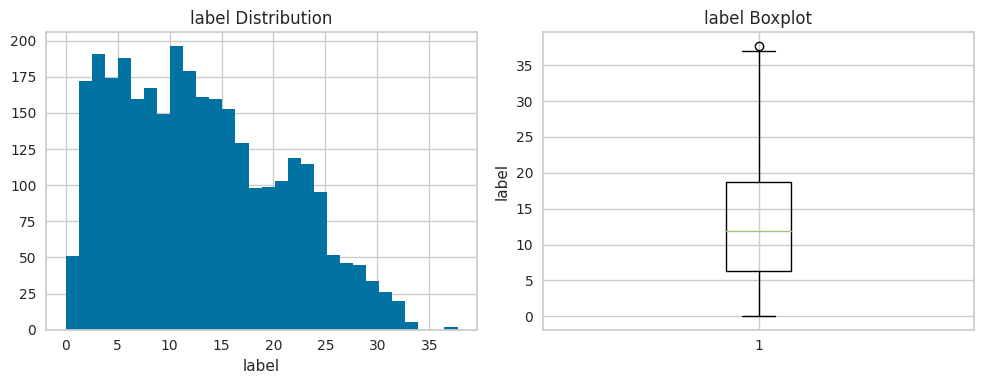

In [22]:
# Basic statistics
print("Dataset statistics:")
print(merged_df[feature_cols + [TARGET_COL]].describe())

# Target variable analysis
print(f"\nTarget variable: {TARGET_COL}")
if merged_df[TARGET_COL].dtype in ['int64', 'float64']:
    print("Target statistics:")
    print(merged_df[TARGET_COL].describe())
    
    # Plot target distribution
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    merged_df[TARGET_COL].hist(bins=30)
    plt.title(f'{TARGET_COL} Distribution')
    plt.xlabel(TARGET_COL)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(merged_df[TARGET_COL])
    plt.title(f'{TARGET_COL} Boxplot')
    plt.ylabel(TARGET_COL)
    plt.tight_layout()
    plt.show()
else:
    print("Target value counts:")
    print(merged_df[TARGET_COL].value_counts())
    
    # Plot target distribution
    plt.figure(figsize=(8, 5))
    merged_df[TARGET_COL].value_counts().plot(kind='bar')
    plt.title(f'{TARGET_COL} Distribution')
    plt.xlabel(TARGET_COL)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [23]:
# Prepare final dataset for machine learning
ml_data = merged_df[[TARGET_COL] + feature_cols].copy()

print(f"ML dataset shape: {ml_data.shape}")
print(f"Features: {len(feature_cols)}")
print(f"Samples: {len(ml_data)}")

# Check final data quality
print("\nFinal data info:")
print(ml_data.info())

# Determine task type
target_unique = merged_df[TARGET_COL].nunique()
if merged_df[TARGET_COL].dtype in ['int64', 'float64'] and target_unique > 10:
    TASK_TYPE = 'regression'
    print(f"\nDetected REGRESSION task (continuous target with {target_unique} unique values)")
else:
    TASK_TYPE = 'classification'
    print(f"\nDetected CLASSIFICATION task ({target_unique} classes)")

print(f"Task type: {TASK_TYPE}")

ML dataset shape: (3089, 257)
Features: 256
Samples: 3089

Final data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Columns: 257 entries, label to F-Ti_1
dtypes: float64(255), int64(2)
memory usage: 6.1 MB
None

Detected REGRESSION task (continuous target with 3050 unique values)
Task type: regression


In [24]:
# Only run this cell if TASK_TYPE == 'regression'
if TASK_TYPE == 'regression':
    print("Setting up regression environment with normalization...")
    
    reg = setup(
            data=ml_data,
            target=TARGET_COL,
            train_size=0.8,
            session_id=123,
            # silent=True,
            fold=5,
            # Minimal preprocessing
            normalize=True,          # Only keep normalization
            transformation=False,    # Disable transformation
            remove_outliers=False,   # Disable outlier removal
            feature_selection=False, # Disable feature selection
        )
    
    print("Regression setup complete with preprocessing!")

Setting up regression environment with normalization...


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Regression
3,Original data shape,"(3089, 257)"
4,Transformed data shape,"(3089, 257)"
5,Transformed train set shape,"(2471, 257)"
6,Transformed test set shape,"(618, 257)"
7,Numeric features,256
8,Preprocess,True
9,Imputation type,simple


Regression setup complete with preprocessing!


In [25]:
# Check what preprocessing was applied
print("=== PREPROCESSING SUMMARY ===")
print("\nDataset shape after preprocessing:")
print(f"Training features: {get_config('X_train').shape}")
print(f"Test features: {get_config('X_test').shape}")

# Show what transformations were applied
print(f"\nFeatures after preprocessing: {len(get_config('X_train').columns)}")
print(f"Original features: {len(feature_cols)}")

if len(get_config('X_train').columns) != len(feature_cols):
    print(f"Feature selection removed: {len(feature_cols) - len(get_config('X_train').columns)} features")

# Show sample of processed data
print("\nSample of preprocessed training data:")
display(get_config('X_train').head())

print("\nPreprocessed data statistics:")
display(get_config('X_train').describe())

# Check if normalization worked (should have mean~0, std~1)
means = get_config('X_train').mean()
stds = get_config('X_train').std()
print(f"\nNormalization check:")
print(f"Feature means range: {means.min():.3f} to {means.max():.3f} (should be near 0)")
print(f"Feature stds range: {stds.min():.3f} to {stds.max():.3f} (should be near 1)")

=== PREPROCESSING SUMMARY ===

Dataset shape after preprocessing:
Training features: (2471, 256)
Test features: (618, 256)

Features after preprocessing: 256
Original features: 256

Sample of preprocessed training data:


,Di_A,Df_A,unit_cell_volume_A3,SA_m2_cm3,SA_m2_g,AV_cm3_g,num_channels,num_pockets,C-C_1,C-H_2,...,N-Ni_1,La-N_1,Sm-Sm_1,Tb-Tb_1,Cl-F_1,Dy-Dy_1,Cr-Mn_1,Al-F_1,Br-Co_1,F-Ti_1
1738,6.336170,4.35059,1191.349976,1284.640015,1272.579956,0.057059,1,1,0.326584,-0.001708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2696,14.905330,13.26072,5037.180176,1716.609985,4790.959961,1.416120,1,0,-0.171491,-0.000043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2151,15.437510,11.49215,6806.109863,1576.400024,5579.129883,2.072530,1,0,0.482089,-0.000132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,7.657100,4.75101,3171.169922,1427.900024,1972.849976,0.099755,1,0,0.771937,0.008643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2848,16.255671,12.68436,5765.279785,1826.530029,4502.390137,1.215250,1,0,-0.227726,0.003615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Preprocessed data statistics:


,Di_A,Df_A,unit_cell_volume_A3,SA_m2_cm3,SA_m2_g,AV_cm3_g,num_channels,num_pockets,C-C_1,C-H_2,...,N-Ni_1,La-N_1,Sm-Sm_1,Tb-Tb_1,Cl-F_1,Dy-Dy_1,Cr-Mn_1,Al-F_1,Br-Co_1,F-Ti_1
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,...,2471.000000,2.471000e+03,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2.471000e+03,2471.000000
mean,10.905416,8.415754,5707.386230,1807.698486,3269.924805,0.633645,1.047349,0.235937,0.034802,0.000544,...,0.000015,2.647011e-07,0.000019,-0.000002,-0.000012,0.000498,0.000012,0.000005,-2.905995e-07,-0.000001
std,4.288625,3.338230,8123.075195,500.519043,1442.981934,0.739544,0.375063,1.157872,0.418510,0.002009,...,0.000556,1.315807e-05,0.000664,0.000092,0.000458,0.024745,0.000617,0.000258,1.444546e-05,0.000059
min,3.274480,2.124780,480.894989,0.000000,0.000000,0.000000,0.000000,0.000000,-1.780989,-0.005790,...,-0.001173,0.000000e+00,0.000000,-0.004550,-0.020287,0.000000,0.000000,0.000000,-7.180714e-04,-0.002947
25%,8.119860,6.177800,2043.130005,1610.854980,2250.844971,0.200531,1.000000,0.000000,-0.263556,-0.000270,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,10.019670,7.743850,3068.979980,1902.569946,3418.780029,0.442726,1.000000,0.000000,-0.080878,0.000092,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,12.665345,9.857665,5067.155029,2111.440063,4296.514893,0.746906,1.000000,0.000000,0.356557,0.001382,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
max,37.928761,35.543480,81731.500000,2998.820068,7197.319824,7.019030,8.000000,24.000000,1.416064,0.017163,...,0.020698,6.540763e-04,0.025311,0.000000,0.000000,1.230057,0.030677,0.012835,0.000000e+00,0.000000



Normalization check:
Feature means range: -0.032 to 5707.386 (should be near 0)
Feature stds range: 0.000 to 8123.075 (should be near 1)


In [26]:
# Only run this cell if TASK_TYPE == 'regression'
if TASK_TYPE == 'regression':
    print("Comparing regression models...")
    
    # Compare multiple algorithms
    best_models = compare_models(
        include=['lr', 'rf', 'et', 'gbr', 'xgboost', 'dt'],
        sort='R2',
        n_select=5,  # Keep top 5 models
        verbose=True
    )
    
    print("Model comparison complete!")

Comparing regression models...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.6845,6.4689,2.5391,0.8956,0.2605,0.3612,0.7720
xgboost,Extreme Gradient Boosting,1.7997,6.9337,2.6305,0.8876,0.2674,0.3459,0.7460
rf,Random Forest Regressor,1.7712,7.0326,2.6493,0.8862,0.2701,0.3713,0.9400
gbr,Gradient Boosting Regressor,2.0664,8.2129,2.8634,0.8671,0.2923,0.5704,1.1780
dt,Decision Tree Regressor,2.3277,12.6219,3.5445,0.7960,0.3482,0.4166,0.0620
lr,Linear Regression,2308360.1011,6221124050480026.0000,37321106.9875,-94822984811310.4219,1.6759,260276.4371,0.6620


Model comparison complete!


In [27]:
# Create the best performing model
print("Creating best model...")
best_model = create_model(best_models[0])

# Tune hyperparameters
print("\nTuning hyperparameters...")
tuned_model = tune_model(best_model, optimize='R2' if TASK_TYPE == 'regression' else 'Accuracy')

print("Model creation and tuning complete!")

Creating best model...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7368,7.0486,2.6549,0.8832,0.2965,0.8064
1,1.7285,6.3597,2.5218,0.9031,0.2556,0.3164
2,1.5189,5.4476,2.3340,0.9077,0.2562,0.2289
3,1.7013,5.9306,2.4353,0.8976,0.2414,0.2215
4,1.7367,7.5582,2.7492,0.8864,0.2529,0.2329
Mean,1.6845,6.4689,2.5391,0.8956,0.2605,0.3612
Std,0.0838,0.7573,0.1488,0.0094,0.0188,0.2252


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Tuning hyperparameters...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3884,10.5828,3.2531,0.8247,0.3607,1.9267
1,2.6221,11.5718,3.4017,0.8237,0.3335,0.5481
2,2.2741,9.7852,3.1281,0.8342,0.3315,0.3640
3,2.3495,10.1051,3.1788,0.8256,0.3151,0.3302
4,2.5213,12.4725,3.5316,0.8125,0.3293,0.3605
Mean,2.4311,10.9035,3.2987,0.8241,0.3340,0.7059
Std,0.1247,0.9899,0.1486,0.0069,0.0148,0.6153


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Model creation and tuning complete!


In [28]:
# Evaluate the tuned model
print("Evaluating model performance...")
evaluate_model(tuned_model)

Evaluating model performance...


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Analyzing feature importance...
PyCaret feature importance not available for this model. Using alternative method...

Tree-based Feature Importance:
                Feature  Importance
3             SA_m2_cm3    0.123360
5              AV_cm3_g    0.109774
0                  Di_A    0.078411
4               SA_m2_g    0.076438
64               C-Li_2    0.075690
68              Li-Li_1    0.074540
66               H-Li_1    0.058753
2   unit_cell_volume_A3    0.055616
67               H-Li_2    0.043970
84               Li-N_1    0.040189
85               Li-N_2    0.028953
75              Li-Zn_1    0.021681
25                H-N_2    0.016234
24                H-N_1    0.015020
1                  Df_A    0.012317


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

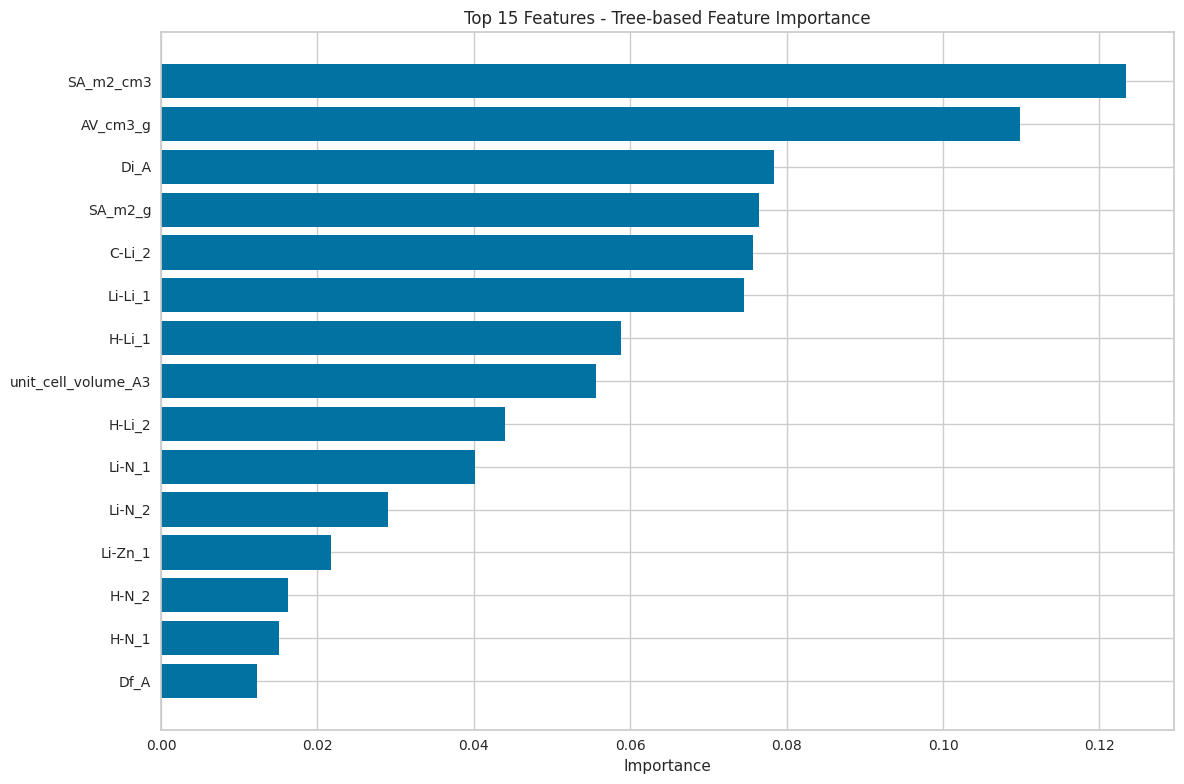


Feature importance saved to: feature_importance.csv

Calculating permutation importance (this may take a moment)...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo


Permutation Importance (Top 15):
         Feature  Importance_Mean  Importance_Std
68       Li-Li_1         0.037019        0.004042
66        H-Li_1         0.008974        0.001691
3      SA_m2_cm3         0.008088        0.001146
14         H-H_1         0.007262        0.001543
6   num_channels         0.003803        0.000611
58       Fe-Fe_1         0.001432        0.000435
65       Cu-Li_1         0.001077        0.000342
27         N-N_1         0.000621        0.000138
24         H-N_1         0.000393        0.000143
95        Cl-N_1         0.000323        0.000201
50       Cu-Cu_1         0.000213        0.000330
51        Cu-H_1         0.000197        0.000277
30        N-Zn_1         0.000185        0.000019
53        Cu-N_1         0.000175        0.000111
22        C-Zn_1         0.000085        0.000041


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

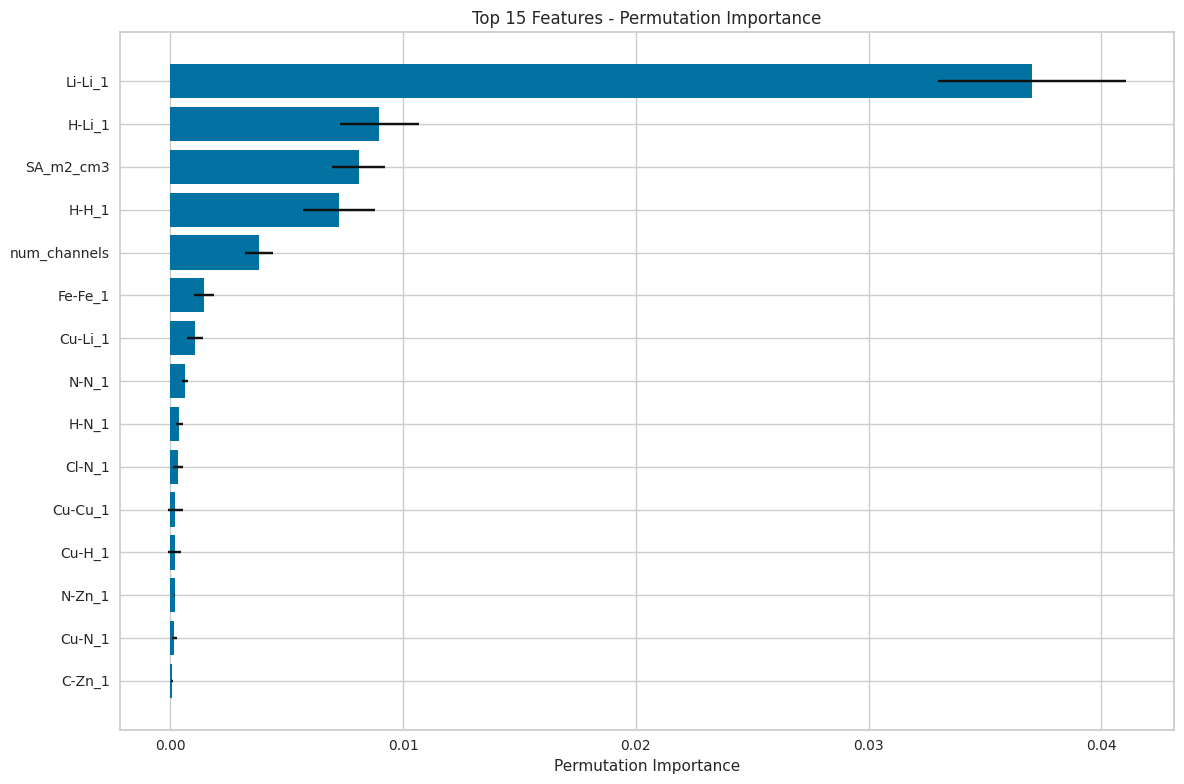


Permutation importance saved to: permutation_importance.csv

Feature importance analysis complete!


In [29]:
# Feature importance analysis
print("Analyzing feature importance...")

try:
    # Try using PyCaret's built-in feature importance
    if TASK_TYPE == 'classification':
        plot_model(tuned_model, plot='feature', display_format='streamlit')
    else:
        plot_model(tuned_model, plot='feature', display_format='streamlit')
except:
    print("PyCaret feature importance not available for this model. Using alternative method...")
    
    # Alternative: Extract feature importance from the model directly
    try:
        # Get the actual sklearn model
        sklearn_model = tuned_model
        
        # Extract feature importance based on model type
        if hasattr(sklearn_model, 'feature_importances_'):
            # Tree-based models (RF, XGBoost, etc.)
            importance_scores = sklearn_model.feature_importances_
            importance_type = "Tree-based Feature Importance"
        elif hasattr(sklearn_model, 'coef_'):
            # Linear models
            importance_scores = np.abs(sklearn_model.coef_).flatten()
            importance_type = "Coefficient Magnitude"
        else:
            print("Feature importance not available for this model type")
            importance_scores = None
        
        if importance_scores is not None:
            # Create feature importance DataFrame
            feature_importance_df = pd.DataFrame({
                'Feature': feature_cols,
                'Importance': importance_scores
            }).sort_values('Importance', ascending=False)
            
            print(f"\n{importance_type}:")
            print(feature_importance_df.head(15))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            top_features = feature_importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['Importance'])
            plt.yticks(range(len(top_features)), top_features['Feature'])
            plt.xlabel('Importance')
            plt.title(f'Top 15 Features - {importance_type}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
            # Save feature importance
            feature_importance_df.to_csv('feature_importance.csv', index=False)
            print(f"\nFeature importance saved to: feature_importance.csv")
            
    except Exception as e:
        print(f"Could not extract feature importance: {e}")
        print("This might be a complex ensemble model where feature importance is not directly accessible")

# Alternative: Use permutation importance (works for any model)
try:
    from sklearn.inspection import permutation_importance
    print("\nCalculating permutation importance (this may take a moment)...")
    
    # Get test data
    X_test = get_config('X_test')
    y_test = get_config('y_test')
    
    # Calculate permutation importance
    perm_importance = permutation_importance(tuned_model, X_test, y_test, 
                                           n_repeats=5, random_state=123, n_jobs=-1)
    
    # Create DataFrame
    perm_importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance_Mean': perm_importance.importances_mean,
        'Importance_Std': perm_importance.importances_std
    }).sort_values('Importance_Mean', ascending=False)
    
    print("\nPermutation Importance (Top 15):")
    print(perm_importance_df.head(15))
    
    # Plot permutation importance
    plt.figure(figsize=(12, 8))
    top_perm_features = perm_importance_df.head(15)
    plt.barh(range(len(top_perm_features)), top_perm_features['Importance_Mean'],
             xerr=top_perm_features['Importance_Std'])
    plt.yticks(range(len(top_perm_features)), top_perm_features['Feature'])
    plt.xlabel('Permutation Importance')
    plt.title('Top 15 Features - Permutation Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Save permutation importance
    perm_importance_df.to_csv('permutation_importance.csv', index=False)
    print(f"\nPermutation importance saved to: permutation_importance.csv")
    
except Exception as e:
    print(f"Could not calculate permutation importance: {e}")

print("\nFeature importance analysis complete!")

=== PREDICTIONS vs ACTUAL ===


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.6895,7.4470,2.7289,0.8728,0.2671,0.2710


Test set predictions:


,Di_A,Df_A,unit_cell_volume_A3,SA_m2_cm3,SA_m2_g,AV_cm3_g,num_channels,num_pockets,C-C_1,C-H_2,...,Sm-Sm_1,Tb-Tb_1,Cl-F_1,Dy-Dy_1,Cr-Mn_1,Al-F_1,Br-Co_1,F-Ti_1,label,prediction_label
1916,20.397190,18.77846,7278.819824,1692.040039,4403.899902,1.312810,1,0,-0.229646,0.004098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.592038,5.428291
1449,16.231039,10.68621,18505.500000,1620.780029,5371.160156,1.989020,1,0,0.183342,-0.000518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.990804,2.889983
2903,5.575890,4.58088,3120.550049,2242.719971,3307.100098,0.110299,1,2,-0.258380,0.003147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.081667,16.137173
2405,11.034950,9.50196,3350.129883,1989.300049,3821.929932,0.693568,1,0,0.114171,-0.000589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.887646,25.350395
289,8.753240,8.00350,3712.419922,2167.250000,3846.590088,0.496254,1,0,-0.255793,0.000039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.521042,23.220363
134,8.090070,4.67875,2139.060059,1829.079956,2284.320068,0.169599,1,0,0.356708,0.000013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.144391,13.794170
2082,11.663140,11.04095,4225.870117,1435.290039,1335.140015,0.251905,3,0,-0.071347,0.000354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.774981,10.871000
235,10.552240,9.50500,2471.949951,1767.729980,2557.870117,0.398497,1,0,0.216475,-0.000173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.304096,16.360741
1785,9.899870,7.26234,2612.850098,1937.130005,3380.659912,0.382894,1,0,0.578332,0.001802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.869122,17.108438
198,10.815340,8.89002,4341.939941,2189.120117,4357.479980,0.708225,1,0,-0.224969,0.000091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.535263,18.207726


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0001,0.0000,0.0019,1.0000,0.0001,0.0000



Training set predictions:


,Di_A,Df_A,unit_cell_volume_A3,SA_m2_cm3,SA_m2_g,AV_cm3_g,num_channels,num_pockets,C-C_1,C-H_2,...,Sm-Sm_1,Tb-Tb_1,Cl-F_1,Dy-Dy_1,Cr-Mn_1,Al-F_1,Br-Co_1,F-Ti_1,label,prediction_label
1738,6.336170,4.350590,1191.349976,1284.640015,1272.579956,0.057059,1,1,0.326584,-0.001708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.937751,7.937751
2696,14.905330,13.260720,5037.180176,1716.609985,4790.959961,1.416120,1,0,-0.171491,-0.000043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.541527,22.541527
2151,15.437510,11.492150,6806.109863,1576.400024,5579.129883,2.072530,1,0,0.482089,-0.000132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.818160,2.818160
1768,7.657100,4.751010,3171.169922,1427.900024,1972.849976,0.099755,1,0,0.771937,0.008643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.992709,10.992709
2848,16.255671,12.684360,5765.279785,1826.530029,4502.390137,1.215250,1,0,-0.227726,0.003615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.786558,2.786558
841,28.730650,18.307831,57910.000000,979.666016,5394.540039,4.270840,1,0,-0.030468,0.000008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.480794,1.480794
773,12.421620,6.485630,7293.669922,2179.560059,3195.399902,0.418711,1,0,0.251604,0.000399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.023945,7.023945
1584,11.600440,7.981530,2382.689941,2191.179932,3875.870117,0.647047,1,0,0.247077,-0.000685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.601225,4.601225
994,9.803230,7.795750,1923.780029,2114.800049,3716.409912,0.494514,1,0,0.426351,-0.002997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.106829,21.106829
1456,13.778250,9.220610,5210.879883,2023.349976,3780.840088,0.687273,1,0,-0.333284,0.002126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.193730,6.193730


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo


=== REGRESSION METRICS ===
Test Set:
  MAE: 1.6895
  RMSE: 2.7289
  R²: 0.8728

Training Set:
  MAE: 0.0001
  RMSE: 0.0019
  R²: 1.0000


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

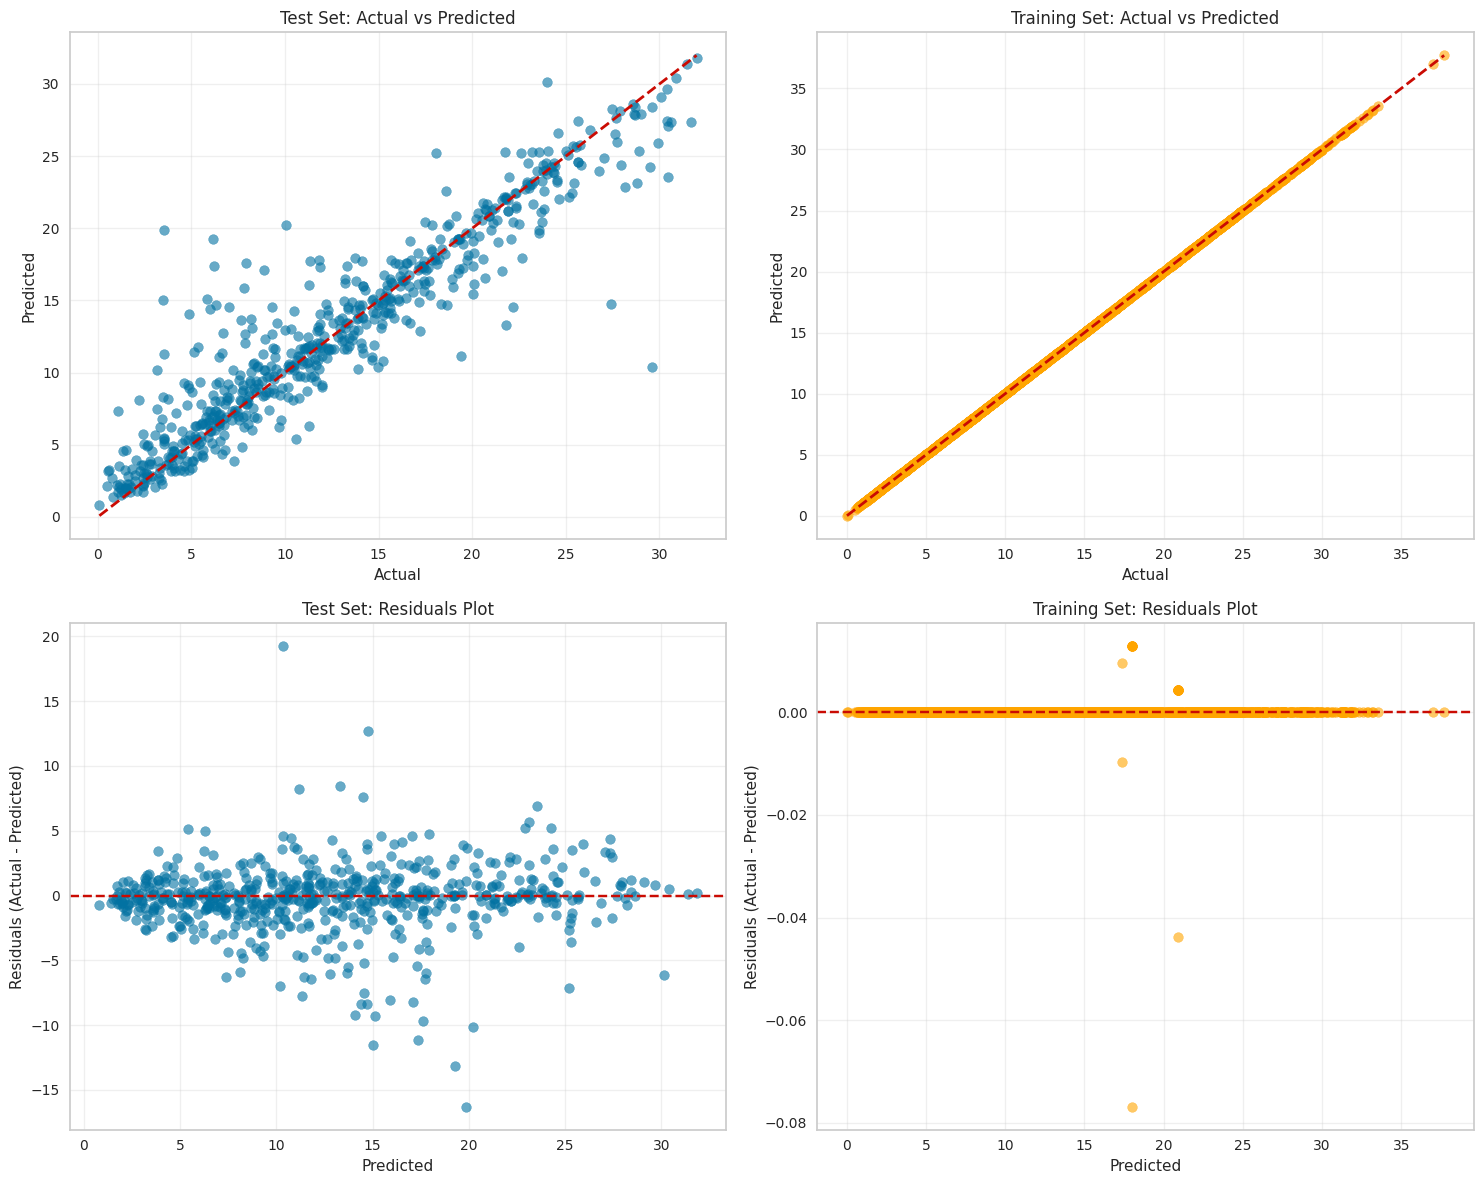


Predictions saved:
- test_predictions.csv (618 samples)
- train_predictions.csv (2471 samples)


In [30]:
# Get predictions on both training and test sets
print("=== PREDICTIONS vs ACTUAL ===")

# Get test set predictions (this includes actual vs predicted)
test_predictions = predict_model(tuned_model)
print("Test set predictions:")
display(test_predictions.head(10))

# Get training set predictions
train_predictions = predict_model(tuned_model, data=get_config('X_train').assign(**{TARGET_COL: get_config('y_train')}))
print("\nTraining set predictions:")
display(train_predictions.head(10))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

if TASK_TYPE == 'regression':
    # For regression: scatter plots of actual vs predicted
    
    # Test set
    axes[0,0].scatter(test_predictions[TARGET_COL], test_predictions['prediction_label'], alpha=0.6)
    axes[0,0].plot([test_predictions[TARGET_COL].min(), test_predictions[TARGET_COL].max()], 
                   [test_predictions[TARGET_COL].min(), test_predictions[TARGET_COL].max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual')
    axes[0,0].set_ylabel('Predicted')
    axes[0,0].set_title('Test Set: Actual vs Predicted')
    axes[0,0].grid(True, alpha=0.3)
    
    # Training set
    axes[0,1].scatter(train_predictions[TARGET_COL], train_predictions['prediction_label'], alpha=0.6, color='orange')
    axes[0,1].plot([train_predictions[TARGET_COL].min(), train_predictions[TARGET_COL].max()], 
                   [train_predictions[TARGET_COL].min(), train_predictions[TARGET_COL].max()], 'r--', lw=2)
    axes[0,1].set_xlabel('Actual')
    axes[0,1].set_ylabel('Predicted')
    axes[0,1].set_title('Training Set: Actual vs Predicted')
    axes[0,1].grid(True, alpha=0.3)
    
    # Residuals plots
    test_residuals = test_predictions[TARGET_COL] - test_predictions['prediction_label']
    train_residuals = train_predictions[TARGET_COL] - train_predictions['prediction_label']
    
    axes[1,0].scatter(test_predictions['prediction_label'], test_residuals, alpha=0.6)
    axes[1,0].axhline(y=0, color='r', linestyle='--')
    axes[1,0].set_xlabel('Predicted')
    axes[1,0].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,0].set_title('Test Set: Residuals Plot')
    axes[1,0].grid(True, alpha=0.3)
    
    axes[1,1].scatter(train_predictions['prediction_label'], train_residuals, alpha=0.6, color='orange')
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,1].set_title('Training Set: Residuals Plot')
    axes[1,1].grid(True, alpha=0.3)
    
    # Print metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    print(f"\n=== REGRESSION METRICS ===")
    print(f"Test Set:")
    print(f"  MAE: {mean_absolute_error(test_predictions[TARGET_COL], test_predictions['prediction_label']):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(test_predictions[TARGET_COL], test_predictions['prediction_label'])):.4f}")
    print(f"  R²: {r2_score(test_predictions[TARGET_COL], test_predictions['prediction_label']):.4f}")
    
    print(f"\nTraining Set:")
    print(f"  MAE: {mean_absolute_error(train_predictions[TARGET_COL], train_predictions['prediction_label']):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(train_predictions[TARGET_COL], train_predictions['prediction_label'])):.4f}")
    print(f"  R²: {r2_score(train_predictions[TARGET_COL], train_predictions['prediction_label']):.4f}")

else:
    # For classification: confusion matrices and distribution plots
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    
    # Test set confusion matrix
    test_cm = confusion_matrix(test_predictions[TARGET_COL], test_predictions['prediction_label'])
    sns.heatmap(test_cm, annot=True, fmt='d', ax=axes[0,0], cmap='Blues')
    axes[0,0].set_title('Test Set: Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')
    
    # Training set confusion matrix
    train_cm = confusion_matrix(train_predictions[TARGET_COL], train_predictions['prediction_label'])
    sns.heatmap(train_cm, annot=True, fmt='d', ax=axes[0,1], cmap='Oranges')
    axes[0,1].set_title('Training Set: Confusion Matrix')
    axes[0,1].set_xlabel('Predicted')
    axes[0,1].set_ylabel('Actual')
    
    # Class distribution comparison
    test_actual = test_predictions[TARGET_COL].value_counts().sort_index()
    test_predicted = test_predictions['prediction_label'].value_counts().sort_index()
    
    x_pos = np.arange(len(test_actual))
    width = 0.35
    axes[1,0].bar(x_pos - width/2, test_actual.values, width, label='Actual', alpha=0.7)
    axes[1,0].bar(x_pos + width/2, test_predicted.values, width, label='Predicted', alpha=0.7)
    axes[1,0].set_xlabel('Classes')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_title('Test Set: Class Distribution')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(test_actual.index)
    axes[1,0].legend()
    
    # Training set class distribution
    train_actual = train_predictions[TARGET_COL].value_counts().sort_index()
    train_predicted = train_predictions['prediction_label'].value_counts().sort_index()
    
    x_pos = np.arange(len(train_actual))
    axes[1,1].bar(x_pos - width/2, train_actual.values, width, label='Actual', alpha=0.7)
    axes[1,1].bar(x_pos + width/2, train_predicted.values, width, label='Predicted', alpha=0.7)
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Count')
    axes[1,1].set_title('Training Set: Class Distribution')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(train_actual.index)
    axes[1,1].legend()
    
    # Print classification reports
    print(f"\n=== CLASSIFICATION METRICS ===")
    print(f"Test Set Classification Report:")
    print(classification_report(test_predictions[TARGET_COL], test_predictions['prediction_label']))
    
    print(f"\nTraining Set Classification Report:")
    print(classification_report(train_predictions[TARGET_COL], train_predictions['prediction_label']))

plt.tight_layout()
plt.show()

# Save predictions to CSV files
test_predictions.to_csv('test_predictions.csv', index=False)
train_predictions.to_csv('train_predictions.csv', index=False)
print(f"\nPredictions saved:")
print(f"- test_predictions.csv ({len(test_predictions)} samples)")
print(f"- train_predictions.csv ({len(train_predictions)} samples)")